# DS4023 Machine Learning :  Linear Regression Exercise


## Part2 : Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. 
One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
path =  'data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [58]:
# normalization
# Select each column of data2
for i in range(len(data2.columns)):
    heads = data2.columns[i]
    # Calculate the z score for each column.
    data2[heads] = (data2[heads] - data2[heads].mean())/data2[heads].std()

Insert a new column ones

In [59]:
data2.insert(0,'Ones',1)
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


### 2.2 Gradient Descent

In part1, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

- We use the same setting for $\theta,\alpha$ and number of iterations
- Expected output for parameters are: $\theta$=``[ -1.1e-16,  8.84-01, -5.25e-2]``; expected output for cost: 0.13

In [60]:
alpha = 0.01
iters = 1500
theta2 = np.matrix(np.array([0.0,0.0,0.0]))
theta2.shape

(1, 3)

In [61]:
def computeCost(X, y, theta):
    # your implementation, same as Part1
    y = np.transpose(y) # Change the data type of y which can use function "len()"
    J = 0               # Initialize the J
    for i in range(1,len(y.T)):    # for-loop to compute the cost
        j = (np.dot(X, theta.T).item(i-1) - y.item(i-1))**2
        J = J + j
    J = J / 2.0 / len(y.T)
    return J

In [62]:
def gradientDescent(X, y, theta, alpha, iters):
    # your implementation
    m = y.size
    cost = []    # Store all cost value
    for i in range(iters): # for-loop to update theta and compute the cost
        temp = theta - (alpha/m)*(np.dot(np.dot(theta,X.T) - y.T,X))
        # Update theta and record cost value for each theta
        theta = np.matrix(np.array(temp))
        cost.append(computeCost(X, y, theta))

    return theta, cost


In [97]:
# set X (training data) and y (target variable)
X2 = data2.iloc[:,0:3] # code here
y2 = data2.iloc[:,3:4]   # code here

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)


# perform linear regression on the data set
g2, cost2 = gradientDescent1(X2, y2, theta2, alpha, iters)
g2

matrix([[-9.44280115e-17,  8.84042349e-01, -5.24551809e-02]])

Get the cost of the model

In [98]:
# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13063667316560468

Plotting the learning process

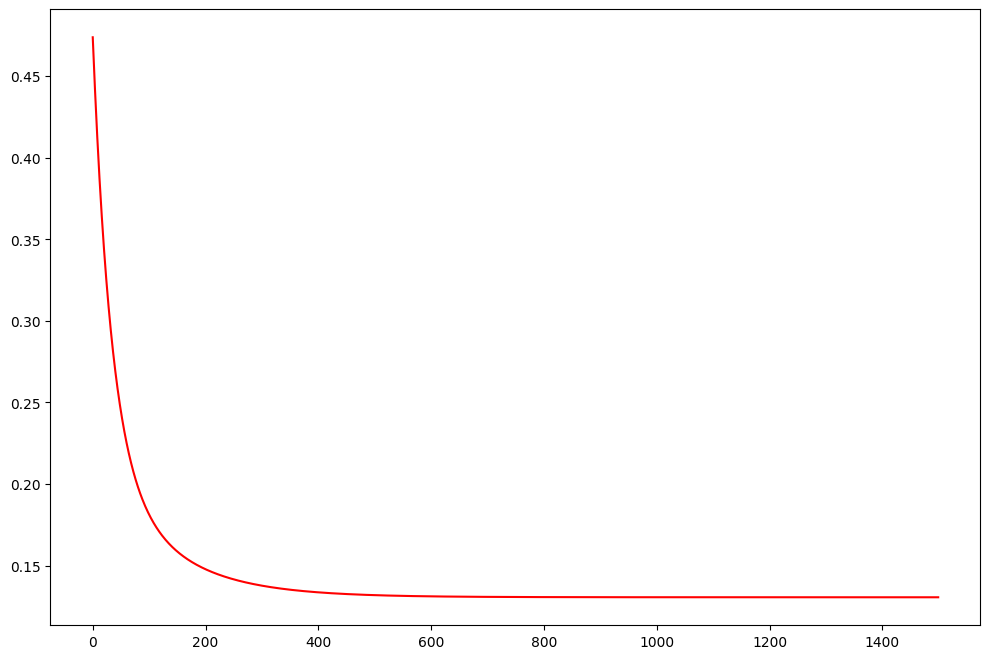

In [99]:
# your code for plotting
length_cost = len(cost2)
x_cost = np.arange(0,length_cost)
length_cost
plt.figure(figsize=(12, 8))
plt.plot(x_cost,cost2,color='r')

### Using ``scikit-learn``
We can also using the ``LinearRegression()`` function provided in ``scikit-learn`` instead of implementing by ourselves. Using the data in both part1 and part2 to compare the model and performance.

In [ ]:
path =  'data1.txt'
ndata1 = pd.read_csv(path, header=None, names=['Population', 'Profit'])
ndata1

In [ ]:
path =  'data1.txt'
ndata1 = pd.read_csv(path, header=None, names=['Population', 'Profit'])
# no need to insert ones using linear regression model

nX1 = ndata1.iloc[:,0]# code here
ny1 = ndata1.iloc[:,1]# code here
path =  'data2.txt'
ndata2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

# Note that the linear regression model of sklearn will not perform feature scaling

nX2 = ndata2.iloc[:,0:2]# code here
ny2 = ndata2.iloc[:,2]# code here

In [ ]:
from sklearn import linear_model

# linear model for ndata1
model1 = linear_model.LinearRegression()
model1.fit(nX1.values.reshape(-1,1),ny1)

#print the parameters
print("Coefficient",model1.coef_,"\nIntercept", model1.intercept_)

In [ ]:
# linear model for ndata2
model1 = linear_model.LinearRegression()
model1.fit(nX2,ny2)

#print the parameters
print("Coefficient",model1.coef_,"\nIntercept", model1.intercept_)